In [1]:
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import google.generativeai as genai
from sklearn.manifold import TSNE

GETTING OUR API KEY:

In [2]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key:  ········


IMPORTING OUR EMBEDDING MODEL (ANY MODEL OF YOUR PREFERENCE WOULD WORK FOR THIS EXAMPLE)

In [3]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

FOR THIS EXAMPLE, WE WILL BE USING fake-and-real-news-dataset from kaggle: 
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset



In [4]:
fake = pd.read_csv("dataset/Fake.csv")
real = pd.read_csv("dataset/True.csv")


In [5]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
fake["class"] = "fake "+fake["subject"]
fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake News
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake Middle-east
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake Middle-east
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake Middle-east
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake Middle-east


In [7]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
real["class"] = "real "+real["subject"]
real

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real politicsNews
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",real worldnews
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",real worldnews
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",real worldnews
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",real worldnews


In [9]:
print(fake['class'].unique())
print(real['class'].unique())

['fake News' 'fake politics' 'fake Government News' 'fake left-news'
 'fake US_News' 'fake Middle-east']
['real politicsNews' 'real worldnews']


In [10]:
shuffled_df = pd.concat([fake, real])

In [11]:
shuffled_df["class"].unique()

array(['fake News', 'fake politics', 'fake Government News',
       'fake left-news', 'fake US_News', 'fake Middle-east',
       'real politicsNews', 'real worldnews'], dtype=object)

WE HAVE REDUCED THE SIZE OF OUR DATASET TO 1000 ROWS. BECAUSE IT TURNED OUT THAT GENERATING THE EMBEDDINGS OF ALL THE 42835 ROWS WOULD TAKE SO MUCH TIME. SO FOR DEMONSTRATION PURPOSE, WE WILL USE 1000 ROWS ONLY

In [12]:
reduced_df = shuffled_df.sample(n=1000, random_state=42).reset_index(drop=True)


In [13]:
title_vector = []
text_vector = []

# Loop through each row with tqdm for a progress bar
for _, row in tqdm.tqdm(reduced_df.iterrows(), total=len(reduced_df), desc="Embedding rows"):
    # Embed the title and text columns  
    title_embedded = embeddings.embed_query(row['title'])
    text_embedded = embeddings.embed_query(row['text'])
    
    # Append the vectors to the lists
    title_vector.append(title_embedded)
    text_vector.append(text_embedded)



Embedding rows: 100%|██████████████████████████████████████████████████████████████| 1000/1000 [21:11<00:00,  1.27s/it]


In [14]:
len(title_vector[0])


768

In [15]:
reduced_df['title_vector'] = title_vector
reduced_df['text_vector'] = text_vector

In [16]:
reduced_df



,title,text,subject,date,class,title_vector,text_vector
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",fake US_News,"[0.002976943738758564, -0.024743981659412384, ...","[0.011535401456058025, -0.04629340022802353, -..."
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",real politicsNews,"[0.05062517896294594, -0.04749896004796028, -0...","[0.049542635679244995, -0.04230156168341637, -..."
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",real politicsNews,"[0.03119930438697338, -0.021371833980083466, -...","[0.030537769198417664, -0.017831122502684593, ..."
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",fake News,"[0.02403009496629238, -0.04682871326804161, 0....","[0.016651608049869537, -0.07344857603311539, -..."
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",real politicsNews,"[0.05065994709730148, -0.04417000710964203, 0....","[7.916617323644459e-05, -0.09052242338657379, ..."
...,...,...,...,...,...,...,...
995,Path cleared for Congress to consider U.S. arm...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"May 30, 2017",real politicsNews,"[-0.00966545008122921, -0.035083942115306854, ...","[-0.00675651291385293, -0.05136045441031456, -..."
996,Democrats urge full review before Senate vote ...,WASHINGTON (Reuters) - Democratic leaders in t...,politicsNews,"September 18, 2017",real politicsNews,"[-0.012868481688201427, -0.05202629044651985, ...","[0.007914269343018532, -0.01793479546904564, -..."
997,WHY PICTURE OF CHE-OBAMA Was Much Worse Than A...,"Oh the irony, of our Nobel-Peace-Prize-Recipie...",left-news,"Mar 25, 2016",fake left-news,"[0.0015803814167156816, -0.0030302153900265694...","[0.03687790781259537, 0.0012259341310709715, -..."
998,#Berkeley CRAZY! RIOTERS CHASE And Beat People...,Is anyone else thinking what we re thinking ab...,politics,"Feb 2, 2017",fake politics,"[0.038573842495679855, -0.021781999617815018, ...","[0.037452131509780884, -0.055512480437755585, ..."


In [30]:
# Let's pickle this reduced datset with embedding vectors for future use
import pickle

with open('reduced_df.pkl', 'wb') as f:
    pickle.dump(reduced_df, f)

print("DataFrame has been saved to 'reduced_df.pkl'.")


DataFrame has been saved to 'reduced_df.pkl'.


In [17]:
X_title= np.array(reduced_df['title_vector'].to_list(), dtype=np.float32)
X_title.shape

(1000, 768)

In [18]:
X_text= np.array(reduced_df['text_vector'].to_list(), dtype=np.float32)
X_text.shape

(1000, 768)

In [19]:
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results_text = tsne.fit_transform(X_text)

df_tsne_text = pd.DataFrame(tsne_results_text, columns=['TSNE1', 'TSNE2'])
df_tsne_text['class'] = reduced_df['class'] # Add labels column from original df to df_tsne
df_tsne_text

,TSNE1,TSNE2,class
0,1.285290,-3.181369,fake US_News
1,-3.451311,-21.299768,real politicsNews
2,15.461320,3.598740,real politicsNews
3,-21.567265,-17.099667,fake News
4,-3.840770,-15.972366,real politicsNews
...,...,...,...
995,18.498007,-0.732146,real politicsNews
996,4.814822,-19.805820,real politicsNews
997,-8.840067,13.933436,fake left-news
998,-18.858423,18.710409,fake politics


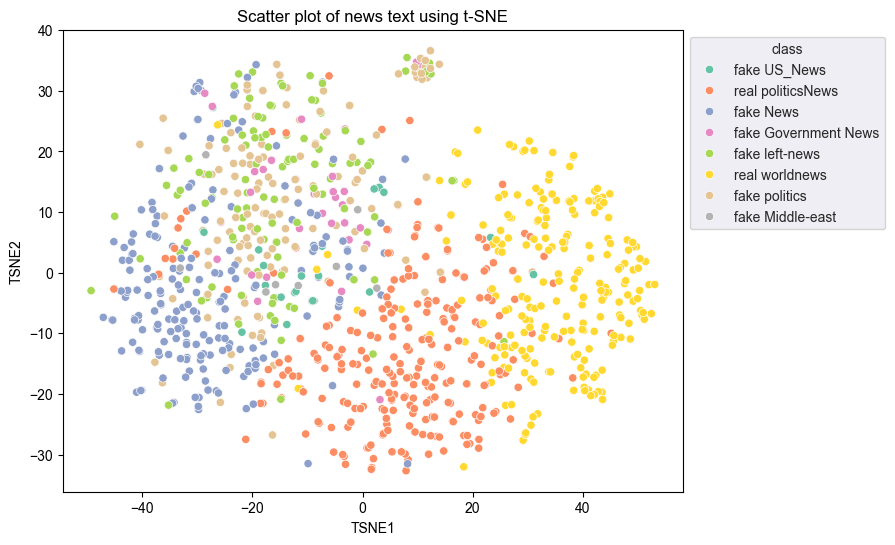

In [20]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne_text, x='TSNE1', y='TSNE2', hue='class', palette='Set2')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news text using t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2');

As we can see in the plot above, the "real politicsNews" (orange) and "real worldnews" (yellow) categories are primarily separate from the fake news categories. This suggests that real and fake news classes are relatively distinguishable, even though there is some overlap between data points. The overlap may be due to the small sample size (200 out of 42,000+ rows), but despite this limitation, the data distribution shows a discernible pattern between real and fake news categories.


LET'S DO THE SAME FOR THE VECTORIZED TITLE COLUMN AND SEE IF THERE IS A PATTERN:

In [21]:
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results_title = tsne.fit_transform(X_title)

df_tsne_title = pd.DataFrame(tsne_results_title, columns=['TSNE1', 'TSNE2'])
df_tsne_title['class'] = reduced_df['class'] # Add labels column from original df to df_tsne
df_tsne_title

,TSNE1,TSNE2,class
0,24.122702,-9.138055,fake US_News
1,8.328631,-14.691171,real politicsNews
2,-17.101284,16.842596,real politicsNews
3,12.536091,-13.073390,fake News
4,-22.700115,-12.652680,real politicsNews
...,...,...,...
995,-16.073664,7.314569,real politicsNews
996,-10.432857,2.407117,real politicsNews
997,37.049320,-8.923351,fake left-news
998,31.748045,25.051910,fake politics


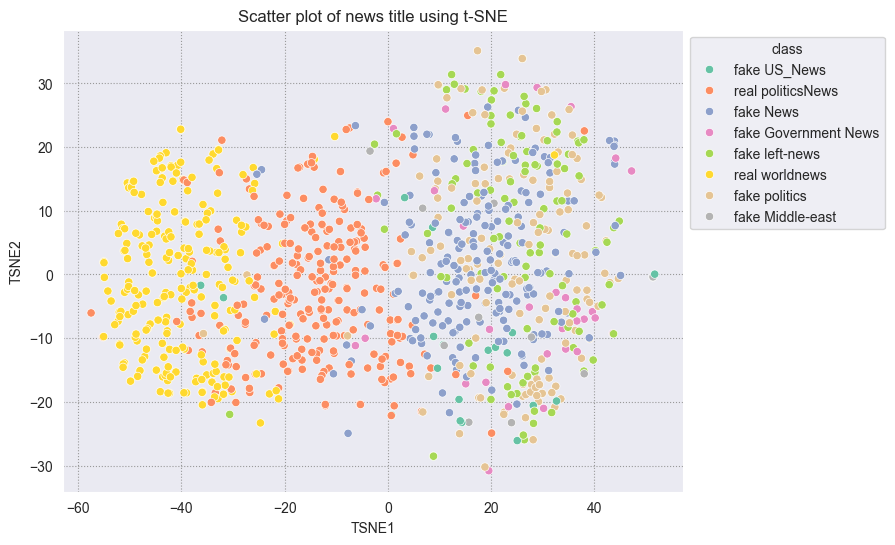

In [22]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne_title, x='TSNE1', y='TSNE2', hue='class', palette='Set2')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news title using t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2');

In the plot above, we observe that the "real politicsNews" (orange) and "real worldnews" (yellow) categories tend to cluster separately from the fake news categories. This separation suggests a discernible distinction between real and fake news, despite some overlap among the classes. The clustering of real news categories in certain areas of the plot and the spread of fake news categories in others indicate a potential pattern, even though a few data points overlap. This pattern might be even more evident with a larger dataset, as this sample only represents a small portion of the full data (1000 out of 42,000+ rows). The plot, however, still reveals a general trend that supports the separability of real and fake news categories.

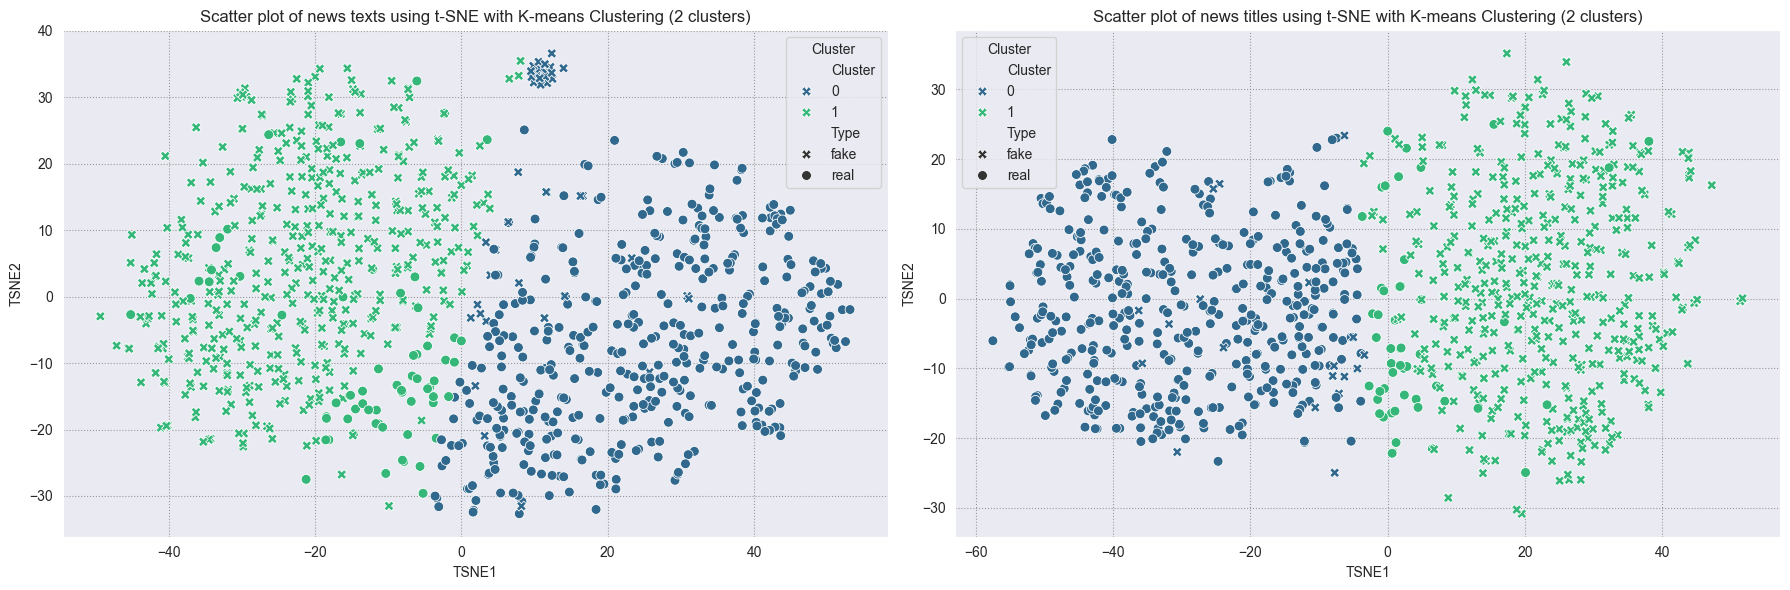

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Define a function to perform clustering and plotting
def plot_kmeans_tsne(df, tsne_columns, title, ax):
    # Apply 'real' or 'fake' labels
    df['Type'] = df['class'].apply(lambda x: 'real' if 'real' in x else 'fake')

    # Perform K-means clustering with 2 clusters
    kmeans = KMeans(n_clusters=2, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[tsne_columns])

    # Plotting
    sns.scatterplot(
        x=tsne_columns[0], y=tsne_columns[1],
        hue='Cluster', style='Type',  # Set style based on "Type" for real/fake
        markers={'real': 'o', 'fake': 'X'},  # Circle for real, cross for fake
        palette='viridis', data=df,
        s=50, ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel(tsne_columns[0])
    ax.set_ylabel(tsne_columns[1])
    ax.legend(title='Cluster')

# Create a figure with two subplots in a single row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for df_tsne_text
plot_kmeans_tsne(df_tsne_text, ['TSNE1', 'TSNE2'], 'Scatter plot of news texts using t-SNE with K-means Clustering (2 clusters)', ax1)

# Plot for df_tsne_title
plot_kmeans_tsne(df_tsne_title, ['TSNE1', 'TSNE2'], 'Scatter plot of news titles using t-SNE with K-means Clustering (2 clusters)', ax2)

# Show the plots
plt.tight_layout()
plt.show()
prin


The clustering results from applying K-means on the vector embeddings of both news titles and texts demonstrate a clear separation between real and fake news. This indicates that the embeddings capture distinctive textual patterns that differentiate the two categories. By representing textual data in high-dimensional vector space, embedding models allow us to identify underlying structures and relationships within the data that may not be immediately obvious in raw text.

Such embeddings are not only useful for classification tasks like identifying real versus fake news but also for advanced analyses such as outlier detection. Since embeddings map text into continuous vector spaces, unusual or anomalous text patterns—such as outlier news articles—can be easily spotted by detecting points that deviate significantly from the main cluster. This highlights the versatility of embedding models, which can aid in both supervised classification tasks and unsupervised techniques like anomaly detection, making them invaluable tools for a wide range of textual data analysis applications.

LET'S TRY MEANSHIFT CLUSTERING AS WE CAN SEE THAT THE CLUSTERS FORMING ARE SEEMINGLY LESS SPHERICAL

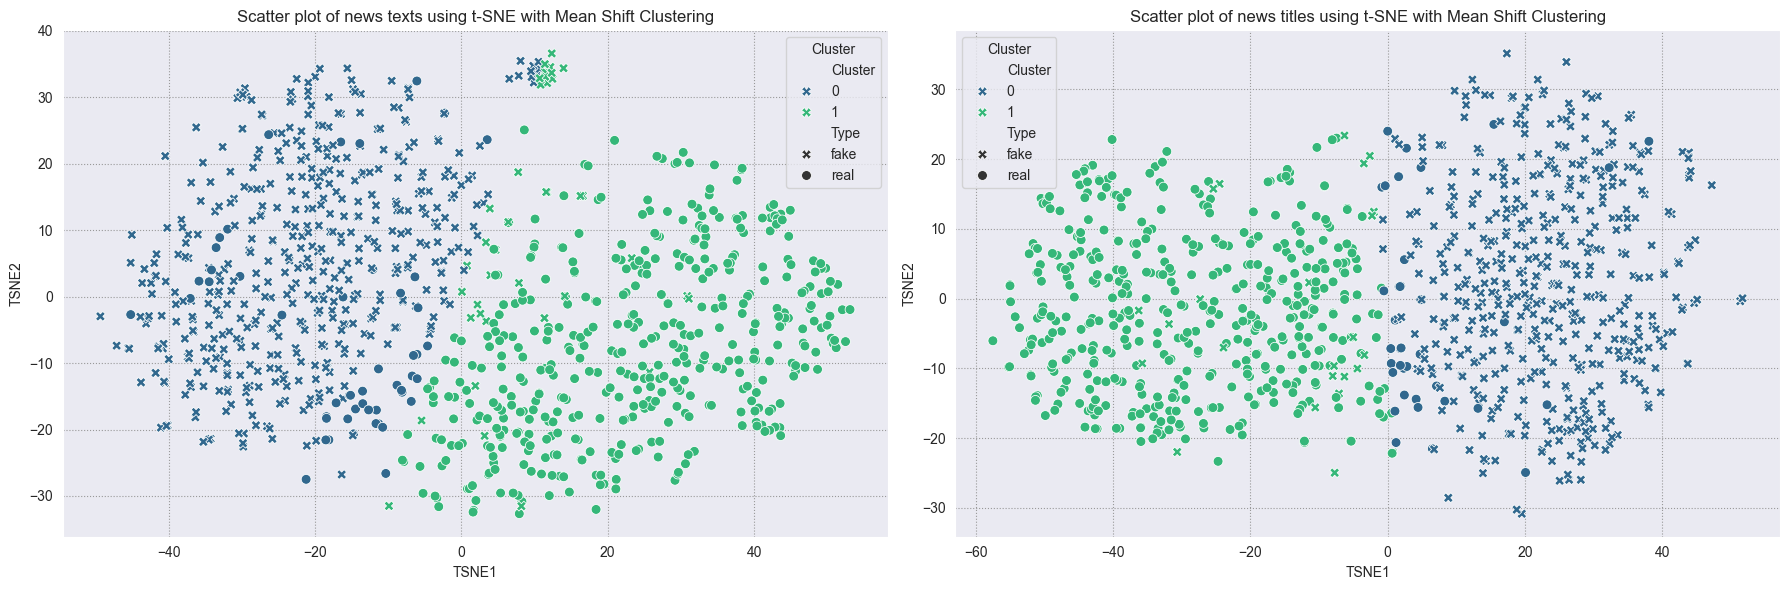

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# Define a function to perform clustering and plotting using Mean Shift
def plot_mean_shift_tsne(df, tsne_columns, title, ax, bandwidth=None):
    # Apply 'real' or 'fake' labels
    df['Type'] = df['class'].apply(lambda x: 'real' if 'real' in x else 'fake')

    # Estimate bandwidth if not provided
    if bandwidth is None:
        bandwidth = estimate_bandwidth(df[tsne_columns], quantile=0.2, n_samples=500)

    # Perform Mean Shift clustering
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    df['Cluster'] = mean_shift.fit_predict(df[tsne_columns])

    # Plotting
    sns.scatterplot(
        x=tsne_columns[0], y=tsne_columns[1],
        hue='Cluster', style='Type',  # Style based on "Type" for real/fake
        markers={'real': 'o', 'fake': 'X'},  # Circle for real, cross for fake
        palette='viridis', data=df,
        s=50, ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel(tsne_columns[0])
    ax.set_ylabel(tsne_columns[1])
    ax.legend(title='Cluster')

# Create a figure with two subplots in a single row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for df_tsne_text with Mean Shift
plot_mean_shift_tsne(df_tsne_text, ['TSNE1', 'TSNE2'], 
                     'Scatter plot of news texts using t-SNE with Mean Shift Clustering', ax1)

# Plot for df_tsne_title with Mean Shift
plot_mean_shift_tsne(df_tsne_title, ['TSNE1', 'TSNE2'], 
                     'Scatter plot of news titles using t-SNE with Mean Shift Clustering', ax2)

# Show the plots
plt.tight_layout()
plt.show()
